In [44]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import display, HTML
import random
import base64

point_list = np.array([[2, 10], [4, 5], [3, 2], [9, 4], [3, 7], [5, 5], [6, 4], [1, 9], [1, 2], [4, 9]])

def random_centroid(num_centroid=2, x_max=10, y_max=10):
    centroids = []
    for _ in range(num_centroid):
        centroids.append([random.uniform(0, x_max), random.uniform(0, y_max)])
    return np.array(centroids)

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

def assign_clusters(points, centroids):
    clusters = []
    for point in points:
        distances = euclidean_distance(point, centroids)
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(points, clusters, num_centroids):
    new_centroids = []
    for i in range(num_centroids):
        cluster_points = points[clusters == i]
        if len(cluster_points) > 0:
            new_centroids.append(cluster_points.mean(axis=0))
        else:
            new_centroids.append([0, 0])  
    return np.array(new_centroids)

k = 3
centroids = random_centroid(k)

In [ ]:
frames = []

for _ in range(5): 
    clusters = assign_clusters(point_list, centroids)
    frames.append((point_list.copy(), centroids.copy(), clusters.copy()))
    centroids = update_centroids(point_list, clusters, k)

fig, ax = plt.subplots()
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)

scat_points = ax.scatter([], [], c=[], cmap='viridis', s=100)
scat_centroids = ax.scatter([], [], c='red', marker='x', s=200)

def init():
    scat_points.set_offsets(np.empty((0, 2)))
    scat_points.set_array([])
    scat_centroids.set_offsets(np.empty((0, 2)))
    return scat_points, scat_centroids

def update(frame):
    points, centroids, clusters = frame
    scat_points.set_offsets(points)
    scat_points.set_array(clusters)
    scat_centroids.set_offsets(centroids)
    return scat_points, scat_centroids

ani = animation.FuncAnimation(fig, update, frames=frames, init_func=init, blit=True, interval=1000)


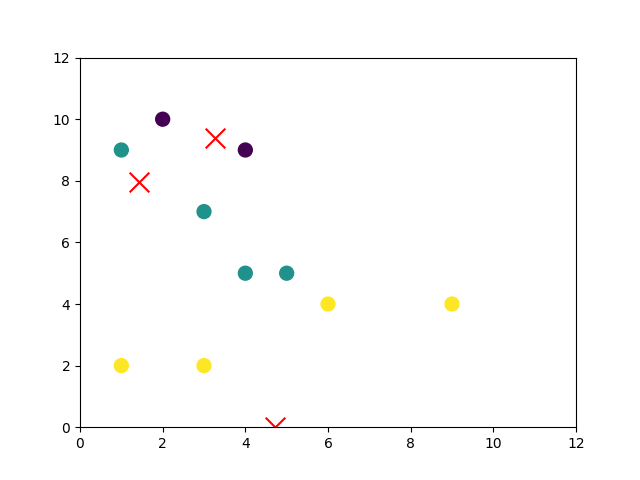

In [47]:
gif_path = 'kmeans_cluster.gif'
with open(gif_path, "rb") as gif_file:
    encoded_gif = base64.b64encode(gif_file.read()).decode('utf-8')

# Hiển thị GIF nhúng
html_code = f'<img src="data:image/gif;base64,{encoded_gif}" />'
display(HTML(html_code))

In [48]:
def calculate_cluster_reports(points, clusters, centroids):
    report = {}
    
    for cluster_id in range(len(centroids)):
        cluster_points = points[clusters == cluster_id]
        
        if len(cluster_points) == 0:
            report[cluster_id] = {'diameter': 0, 'radius': 0}
            continue
        
        # Tính diameter
        max_distance = 0
        for i in range(len(cluster_points)):
            for j in range(i + 1, len(cluster_points)):
                distance = np.sqrt(np.sum((cluster_points[i] - cluster_points[j]) ** 2))
                max_distance = max(max_distance, distance)
        
        # Tính bán kính radius
        centroid = centroids[cluster_id]
        max_radius = 0
        for point in cluster_points:
            distance = np.sqrt(np.sum((point - centroid) ** 2))
            max_radius = max(max_radius, distance)
        
        report[cluster_id] = {'diameter': max_distance, 'radius': max_radius}
    
    return report

cluster_report = calculate_cluster_reports(point_list, clusters, centroids)

print("Cluster Reports:")
for cluster_id, report in cluster_report.items():
    print(f"Cluster {cluster_id}:")
    print(f"  Diameter: {report['diameter']:.3f}")
    print(f"  Radius: {report['radius']:.3f}")
    print()

Cluster Reports:
Cluster 0:
  Diameter: 3.000
  Radius: 1.500

Cluster 1:
  Diameter: 5.000
  Radius: 2.704

Cluster 2:
  Diameter: 3.162
  Radius: 1.820

